<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

# Flight delays

Let's study the statistics of flight delays and try to identify some patterns.

First, let's understand which day of the week is the most risky and which is the least.

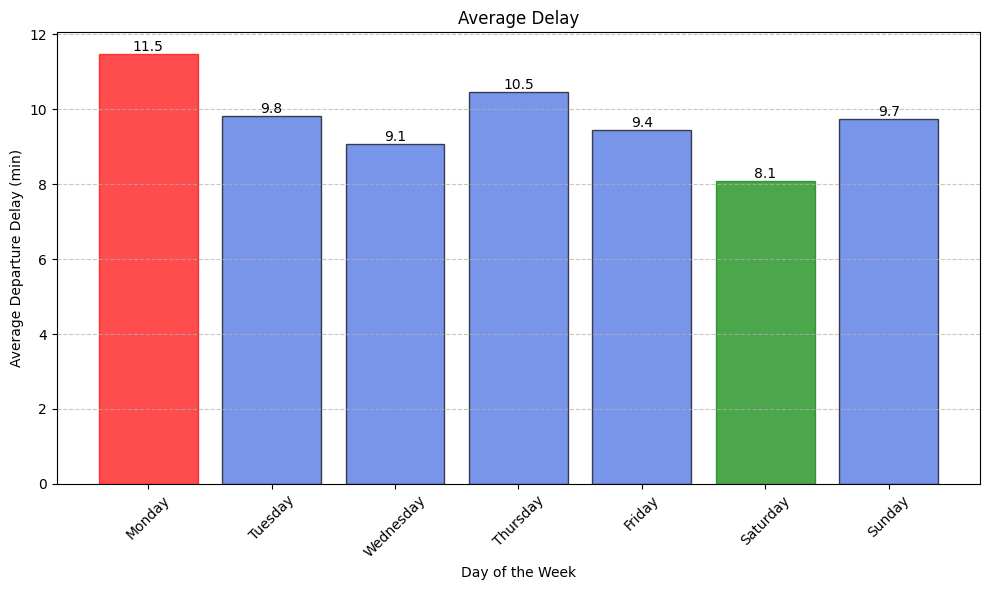

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

flights_file = "./assets/task4/flights.csv"

df_flights = pd.read_csv(flights_file, dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})

is_valid_origin = ~df_flights["ORIGIN_AIRPORT"].astype(str).str.isdigit()
is_valid_destination = ~df_flights["DESTINATION_AIRPORT"].astype(str).str.isdigit()
df_flights = df_flights[is_valid_origin & is_valid_destination]

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_delays = df_flights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(days_of_week, avg_delays, color='royalblue', alpha=0.7, edgecolor='black')
bars[np.argmax(avg_delays)].set_color('red')
bars[np.argmin(avg_delays)].set_color('green')
for bar, value in zip(bars, avg_delays):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (min)")
plt.title("Average Delay")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As we can see, the busiest day is Monday. It is on this day that, on average, flight delays are the longest. And on Saturday, on the contrary, the shortest.

In general, the average delay time does not differ so much

Now let's explore which cities and airlines experience delays more often.
Let's start with cities, or more precisely, let's explore airport delays

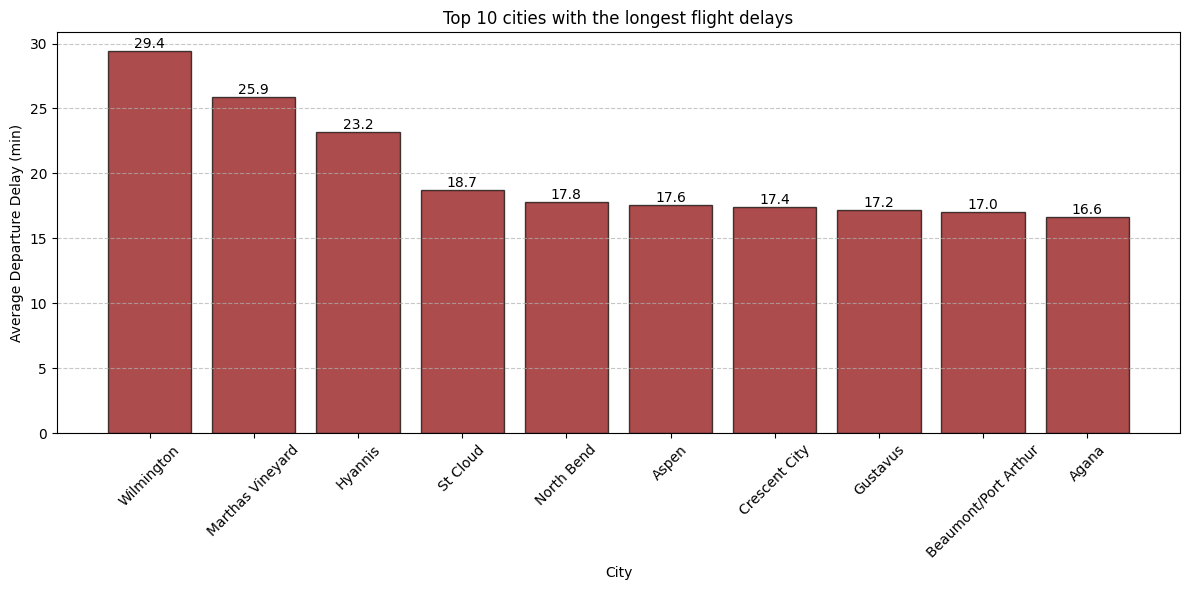

In [32]:
airports_file = "./assets/task4/airports.csv"

df_airports = pd.read_csv(airports_file)[["IATA_CODE", "CITY"]]
airport_delays = df_flights.groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].mean().reset_index()
df_airports.rename(columns={"IATA_CODE": "ORIGIN_AIRPORT"}, inplace=True)
df_airport_delays = airport_delays.merge(df_airports, on="ORIGIN_AIRPORT", how="left")

top_airports = df_airport_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_airports["CITY"], top_airports["DEPARTURE_DELAY"], color='darkred', alpha=0.7, edgecolor='black')
for bar, value in zip(bars, top_airports["DEPARTURE_DELAY"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("City")
plt.ylabel("Average Departure Delay (min)")
plt.title("Top 10 cities with the longest flight delays")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Wilmington has the longest average flight delays.

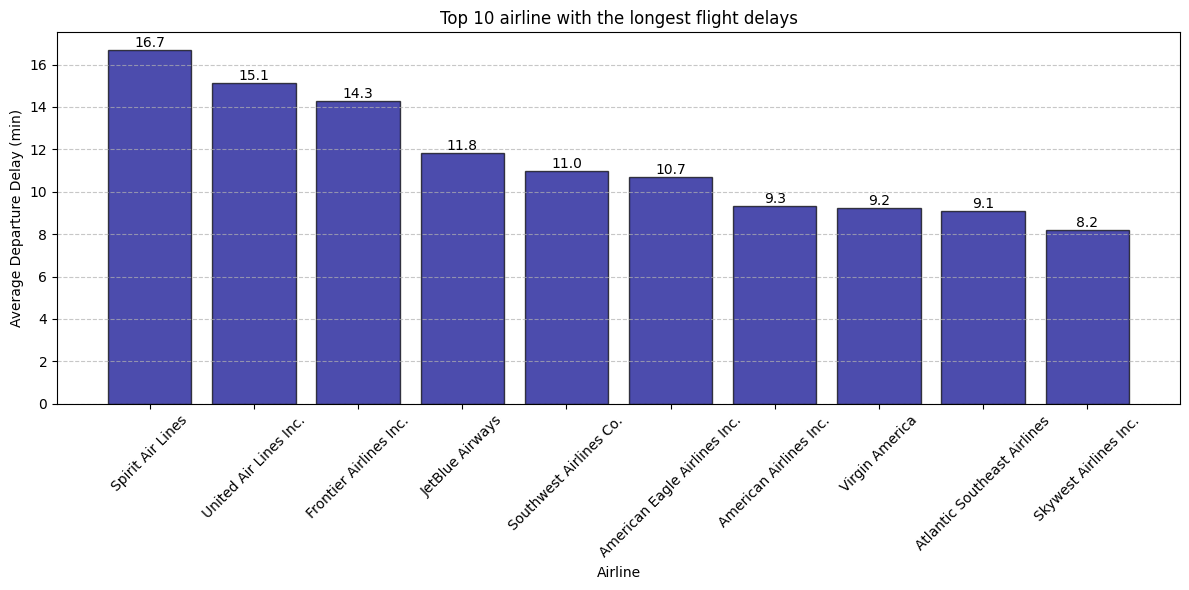

In [33]:
airlines_file = "./assets/task4/airlines.csv"

airline_delays = df_flights.groupby("AIRLINE")["DEPARTURE_DELAY"].mean().reset_index()

df_airlines = pd.read_csv(airlines_file)
df_airlines = df_airlines.drop_duplicates(subset=["IATA_CODE"])
df_airlines.rename(columns={"IATA_CODE": "AIRLINE", "AIRLINE": "AIRLINE_NAME"}, inplace=True)
df_airline_delays = airline_delays.merge(df_airlines, on="AIRLINE", how="left")
top_airlines = df_airline_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_airlines["AIRLINE_NAME"], top_airlines["DEPARTURE_DELAY"], color='darkblue', alpha=0.7, edgecolor='black')
for bar, value in zip(bars, top_airlines["DEPARTURE_DELAY"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.1f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Airline")
plt.ylabel("Average Departure Delay (min)")
plt.title("Top 10 airline with the longest flight delays")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

If you look at airlines, Spirit Air Lines has the longest delays.

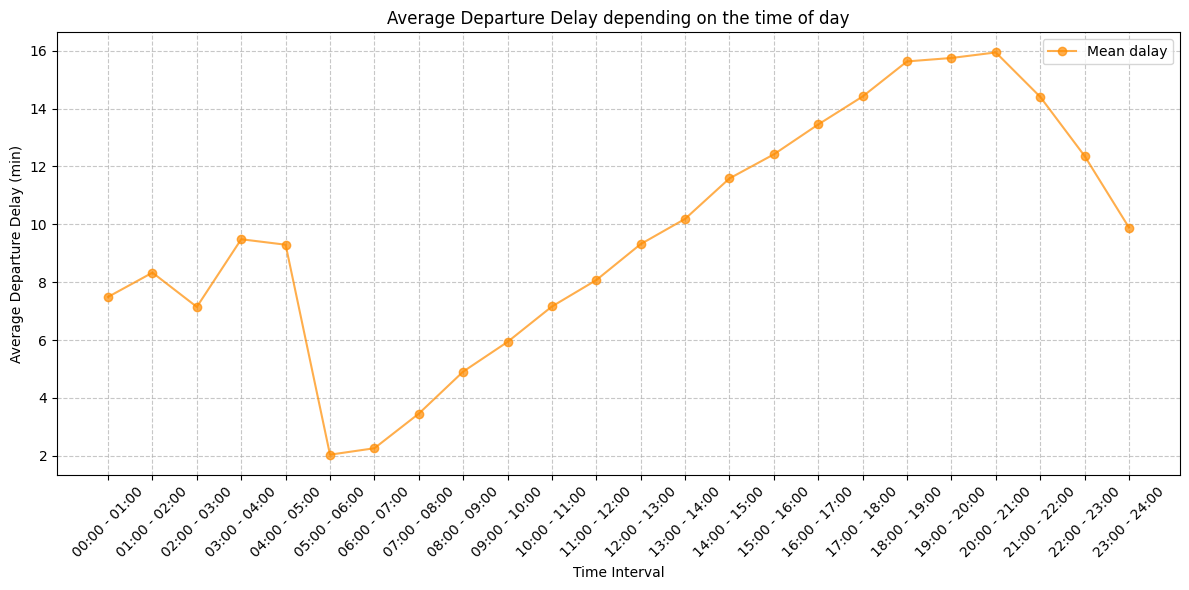

In [35]:
import numpy as np

df_flights = df_flights.dropna(subset=["SCHEDULED_DEPARTURE"])
df_flights["HOUR"] = df_flights["SCHEDULED_DEPARTURE"] // 100
time_delays = df_flights.groupby("HOUR")["DEPARTURE_DELAY"].mean()
time_intervals = [f"{hour:02d}:00 - {hour+1:02d}:00" for hour in range(24)]

plt.figure(figsize=(12, 6))
plt.plot(time_intervals, time_delays, marker='o', linestyle='-', color='darkorange', alpha=0.7, label="Mean dalay")

plt.xlabel("Time Interval")
plt.ylabel("Average Departure Delay (min)")
plt.title("Average Departure Delay depending on the time of day")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

The longest delays usually occur in the evening. This is the most convenient period for departures for passengers. Therefore, this period accounts for the largest number of flights. And airports are not always able to cope with such a load

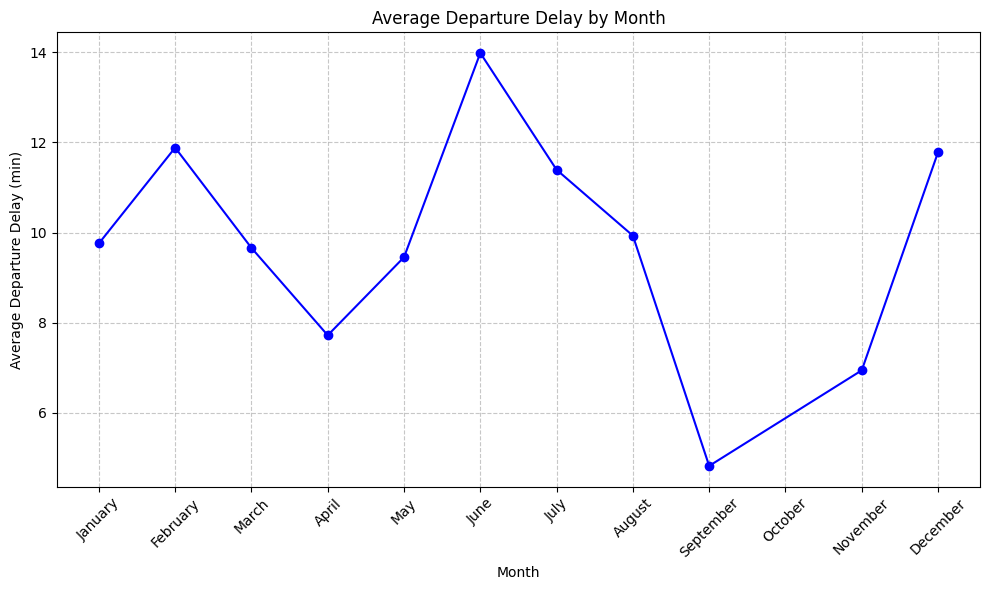

In [39]:
monthly_delays = df_flights.groupby("MONTH")["DEPARTURE_DELAY"].mean().reset_index()
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(10, 6))
plt.plot(monthly_delays["MONTH"], monthly_delays["DEPARTURE_DELAY"], marker='o', linestyle='-', color='blue')
plt.title("Average Departure Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Departure Delay (min)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(1, 13), month_names, rotation=45)
plt.tight_layout()
plt.show()


Finally, let's look at the locations of the airports and compare their loads.

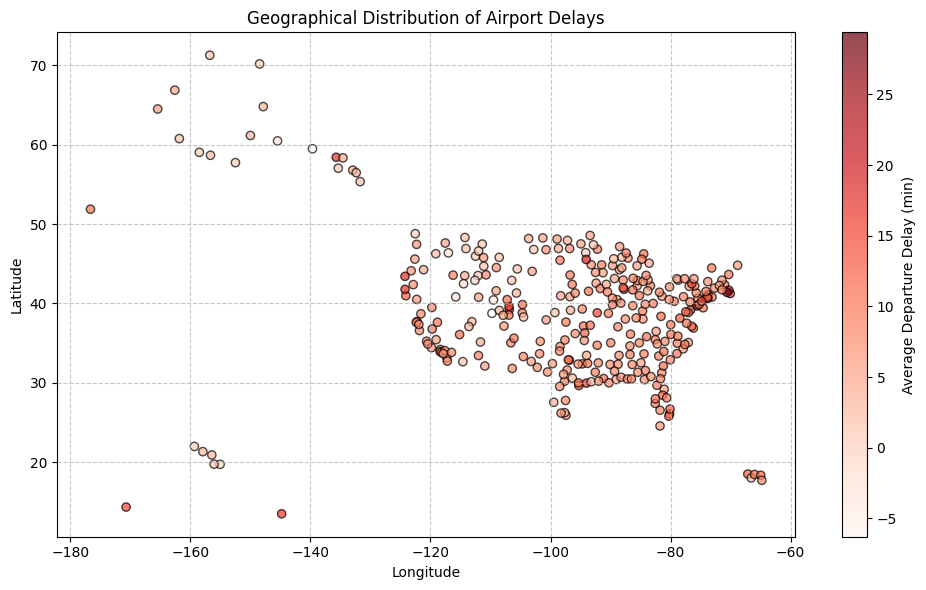

In [37]:
df_airports = pd.read_csv(airports_file)
airport_delays = df_flights.groupby("ORIGIN_AIRPORT")["DEPARTURE_DELAY"].mean().reset_index()

df_airports = df_airports[["IATA_CODE", "LATITUDE", "LONGITUDE"]]
df_airports.rename(columns={"IATA_CODE": "ORIGIN_AIRPORT"}, inplace=True)
df_airport_delays = airport_delays.merge(df_airports, on="ORIGIN_AIRPORT", how="left")

top_airports = df_airport_delays.nlargest(10, "DEPARTURE_DELAY")

plt.figure(figsize=(10, 6))
plt.scatter(df_airport_delays["LONGITUDE"], df_airport_delays["LATITUDE"], c=df_airport_delays["DEPARTURE_DELAY"], cmap="Reds", alpha=0.7, edgecolors="black")
plt.colorbar(label="Average Departure Delay (min)")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Airport Delays")
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()